In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('covid_countries_data.csv')

In [3]:
df.head(200)

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,Afghanistan,2/24/20,5,5,0,0,41128772
1,Afghanistan,2/25/20,5,0,0,0,41128772
2,Afghanistan,2/26/20,5,0,0,0,41128772
3,Afghanistan,2/27/20,5,0,0,0,41128772
4,Afghanistan,2/28/20,5,0,0,0,41128772
...,...,...,...,...,...,...,...
195,Afghanistan,9/6/20,38484,94,1416,3,41128772
196,Afghanistan,9/7/20,38580,96,1419,3,41128772
197,Afghanistan,9/8/20,38606,26,1422,3,41128772
198,Afghanistan,9/9/20,38630,24,1424,2,41128772


In [4]:
# 1. At least two statistical summary (mean, sum, count, median etc).

In [5]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,population
count,2.457250e+05,2.457250e+05,2.457250e+05,245725.000000,2.457250e+05
mean,1.262001e+06,2.794144e+03,1.756822e+04,27.880269,3.639720e+07
std,5.514956e+06,1.715704e+04,7.246697e+04,193.903385,1.407551e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.700000e+01
25%,2.717000e+03,0.000000e+00,2.800000e+01,0.000000,7.242720e+05
50%,3.759100e+04,1.600000e+01,5.510000e+02,0.000000,6.336393e+06
75%,4.049700e+05,4.710000e+02,6.030000e+03,5.000000,2.620798e+07
max,1.031685e+08,1.354500e+06,1.117820e+06,59895.000000,1.425887e+09


In [6]:
# Since the figures are cumilative I choosed last date of record wich is 2023-02-21 	
df['date'] = pd.to_datetime(df['date'])
new_df = df[df['date'] ==     '2023-02-21']
new_df


,location,date,total_cases,new_cases,total_deaths,new_deaths,population
1093,Afghanistan,2023-02-21,209181,28,7896,0,41128772
2186,Albania,2023-02-21,334336,21,3596,0,2842318
3279,Algeria,2023-02-21,271428,2,6881,0,44903228
4366,Andorra,2023-02-21,47866,0,165,0,79843
5435,Angola,2023-02-21,105184,0,1931,0,35588996
...,...,...,...,...,...,...,...
240626,Vietnam,2023-02-21,11526834,9,43186,0,98186856
242535,Wallis and Futuna,2023-02-21,3427,0,7,0,11596
243584,Yemen,2023-02-21,11945,0,2159,0,33696612
244655,Zambia,2023-02-21,342782,58,4055,1,20017670


In [7]:
# I will work on the United States with last cumulative record
new_df[new_df['location'] == 'United States'] 


,location,date,total_cases,new_cases,total_deaths,new_deaths,population
233540,United States,2023-02-21,103168534,43889,1117820,257,338289856


In [8]:
# Getting .sum() for the United States:  
new_df[new_df['location'] == 'United States'].sum()

/var/folders/rb/8k519z7935d2j5l0x1lztqx40000gn/T/ipykernel_24877/10759652.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df[new_df['location'] == 'United States'].sum()


location        United States
total_cases         103168534
new_cases               43889
total_deaths          1117820
new_deaths                257
population          338289856
dtype: object

In [9]:
new_df.describe()


,total_cases,new_cases,total_deaths,new_deaths,population
count,2.190000e+02,219.000000,2.190000e+02,219.000000,2.190000e+02
mean,3.142277e+06,746.063927,3.145535e+04,3.114155,3.657335e+07
std,9.711701e+06,4024.554486,1.061184e+05,19.789042,1.410873e+08
min,1.000000e+00,0.000000,0.000000e+00,0.000000,8.080000e+02
25%,2.893600e+04,0.000000,2.315000e+02,0.000000,7.533645e+05
50%,2.636420e+05,0.000000,2.686000e+03,0.000000,6.780745e+06
75%,1.488084e+06,10.000000,1.727900e+04,0.000000,2.619270e+07
max,1.031685e+08,43889.000000,1.117820e+06,257.000000,1.425887e+09


In [10]:
# Max Number of Cases: 
max_cases = new_df['total_cases'].max()
max_cases

103168534

In [11]:
# Total Deathes:
t_deathes  = new_df['total_deaths'].sum()
t_deathes

6888722

In [12]:
# Total Cases:
t_cases  = new_df['total_cases'].sum()
t_cases

688158743

In [13]:
# Median Cases:
M_cases  = new_df['total_cases'].mean()
M_cases

3142277.365296804

In [14]:
# Minimum Cases:
Mi_cases  = new_df['total_cases'].min()
Mi_cases

1

In [15]:
# Total Cases in USA
t_cases_usa = new_df[new_df['location'] == 'United States'][['location','total_cases']]
t_cases_usa

,location,total_cases
233540,United States,103168534


In [16]:
# USA Total Cases percentage comparing with other countries = 14.99 %
per_usa = (t_cases_usa['total_cases'] / t_cases ) * 100
per_usa

233540    14.991967
Name: total_cases, dtype: float64

In [17]:
# So Minimum number of cases = 1 
# Get the country that has the minimum value = 1 

min_cases = new_df.loc[new_df['total_cases']== 1]
min_cases

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
160430,North Korea,2023-02-21,1,0,6,0,26069416


In [18]:
# Getting Max Nmber of Cases: 
new_df['total_cases'].max()

103168534

In [19]:
# Getting the country that has the Max value of Cases = 103168534
max_cases = new_df.loc[new_df['total_cases']== 103168534]
max_cases


,location,date,total_cases,new_cases,total_deaths,new_deaths,population
233540,United States,2023-02-21,103168534,43889,1117820,257,338289856


In [20]:
# Getting Average Nmber of Deaths: 
new_df['total_deaths'].mean()

31455.351598173515

In [21]:
# Getting Total number of Deaths:
new_df['total_deaths'].sum()

6888722

In [22]:
# Getting Min number of Deaths: 
new_df['total_deaths'].min()

0

In [23]:
# Getting Max Nmber of Deaths: 
new_df['total_deaths'].max()

1117820

In [24]:
# Getting the country that has the Max value of Deaths = 1117820
max_deaths = new_df.loc[new_df['total_deaths']== 1117820]
max_deaths

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
233540,United States,2023-02-21,103168534,43889,1117820,257,338289856


In [25]:
# Getting the country that has the Min value of Deaths = 0
min_deaths = new_df.loc[new_df['total_deaths']== 0]
min_deaths

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
74294,Falkland Islands,2023-02-21,1930,0,0,0,3801
184101,Saint Helena,2023-02-21,2166,0,0,0,5401
228020,Tuvalu,2023-02-21,2805,0,0,0,11335
238425,Vatican,2023-02-21,29,0,0,0,808


In [26]:
df['total_deaths'].mean()

17568.219363109165

In [27]:
df['total_deaths'].sum()

4316950703

In [28]:
df['total_deaths'].max()

1117820

In [29]:
df['total_deaths'].min()

0

In [30]:
# 2. At least two analyses of patterns, relationship etc. found in the data.

In [31]:

sum_x1 = new_df.groupby('location').sum()
sum_x1

,total_cases,new_cases,total_deaths,new_deaths,population
location,,,,,
Afghanistan,209181,28,7896,0,41128772
Albania,334336,21,3596,0,2842318
Algeria,271428,2,6881,0,44903228
Andorra,47866,0,165,0,79843
Angola,105184,0,1931,0,35588996
...,...,...,...,...,...
Vietnam,11526834,9,43186,0,98186856
Wallis and Futuna,3427,0,7,0,11596
Yemen,11945,0,2159,0,33696612


In [32]:
# Modify 
# av_x1 = new_df.groupby('location').mean()
av_x1 = new_df.mean()
av_x1

/var/folders/rb/8k519z7935d2j5l0x1lztqx40000gn/T/ipykernel_24877/953434844.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  av_x1 = new_df.mean()
/var/folders/rb/8k519z7935d2j5l0x1lztqx40000gn/T/ipykernel_24877/953434844.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  av_x1 = new_df.mean()


total_cases     3.142277e+06
new_cases       7.460639e+02
total_deaths    3.145535e+04
new_deaths      3.114155e+00
population      3.657335e+07
dtype: float64

In [33]:
# Relationship between Location and Total Number of Cases: 
# rel_loc_cases = new_df.groupby('location')['total_cases'].sum()
# Modify

rel_loc_cases = new_df[['location','total_cases']]
rel_loc_cases

,location,total_cases
1093,Afghanistan,209181
2186,Albania,334336
3279,Algeria,271428
4366,Andorra,47866
5435,Angola,105184
...,...,...
240626,Vietnam,11526834
242535,Wallis and Futuna,3427
243584,Yemen,11945
244655,Zambia,342782


In [34]:
# Relationship between Location and Total Number of Deaths: 

rel_loc_deaths = new_df[['location','total_deaths']]
rel_loc_deaths

,location,total_deaths
1093,Afghanistan,7896
2186,Albania,3596
3279,Algeria,6881
4366,Andorra,165
5435,Angola,1931
...,...,...
240626,Vietnam,43186
242535,Wallis and Futuna,7
243584,Yemen,2159
244655,Zambia,4055


In [35]:
# Top 10 Countries total_cases: 
t10_cases = rel_loc_cases.sort_values(by = 'total_cases', ascending=False).head(10)
t10_cases


,location,total_cases
233540,United States,103168534
100897,India,44686483
77658,France,39636047
83095,Germany,38043874
30400,Brazil,36987682
110756,Japan,33139504
205954,South Korea,30458857
108551,Italy,25547414
232413,United Kingdom,24341615
182128,Russia,21878868


In [36]:
# Top 10 Countries Death Cases:
t10_deaths = rel_loc_deaths.sort_values(by = 'total_deaths' , ascending=False).head(10)
t10_deaths

,location,total_deaths
233540,United States,1117820
30400,Brazil,698050
100897,India,530762
182128,Russia,387899
140174,Mexico,332850
174256,Peru,219351
232413,United Kingdom,218405
108551,Italy,187850
83095,Germany,167491
77658,France,164860


In [37]:
# Relationship between Population and Total Number of Deaths: 
rel_pop_death = new_df[['population' , 'total_deaths']]
rel_pop_death

,population,total_deaths
1093,41128772,7896
2186,2842318,3596
3279,44903228,6881
4366,79843,165
5435,35588996,1931
...,...,...
240626,98186856,43186
242535,11596,7
243584,33696612,2159
244655,20017670,4055


In [38]:
# Top 10 Poulation with total_Deaths:
t10_pop_death = rel_pop_death.sort_values(by ='population' , ascending=False).head(10)
t10_pop_death


,population,total_deaths
45601,1425887360,87468
100897,1417173120,530762
233540,338289856,1117820
101984,275501344,160892
168309,235824864,30641
158932,218541216,3155
30400,215313504,698050
17463,171186368,29445
182128,144713312,387899
140174,127504120,332850


In [39]:

# 3. At least two visualizations - at least one for statistical summary, at least one for
# analysis.

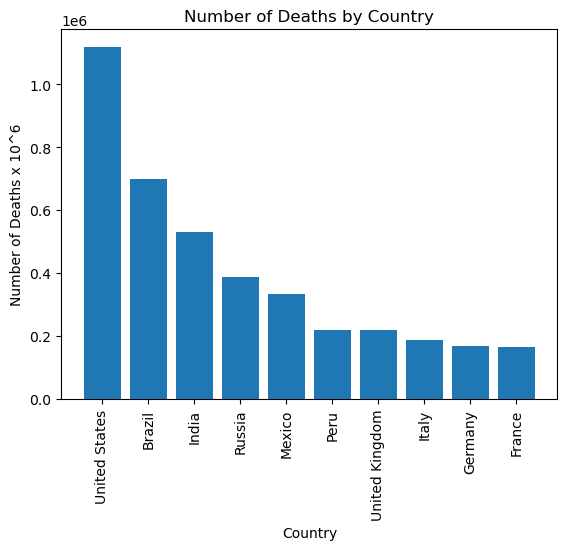

In [40]:
# Bar Chart for Top 10 Countries Death Cases:


# Create the bar chart
plt.bar(t10_deaths['location'], t10_deaths['total_deaths'])

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Deaths x 10^6')
plt.title('Number of Deaths by Country')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

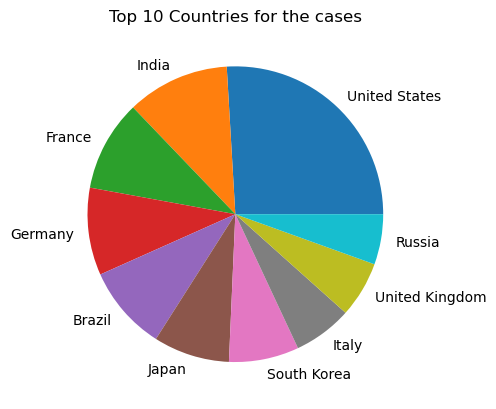

In [41]:
plt.pie(t10_cases['total_cases'], labels = t10_cases['location'])
plt.title('Top 10 Countries for the cases')
plt.show()



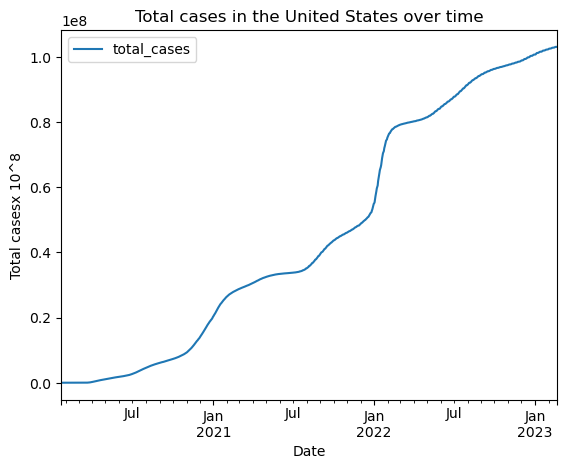

In [42]:
# Line chart indicating the total cases over time for a specific location
df[df['location']=='United States'].plot(x='date', y='total_cases')
plt.title("Total cases in the United States over time")
plt.xlabel("Date")
plt.ylabel("Total casesx 10^8")
plt.show()

In [43]:
us_df = df[df['location'] == 'United States']
us_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
232414,United States,2020-01-22,1,0,0,0,338289856
232415,United States,2020-01-23,1,0,0,0,338289856
232416,United States,2020-01-24,2,1,0,0,338289856
232417,United States,2020-01-25,2,0,0,0,338289856
232418,United States,2020-01-26,5,3,0,0,338289856
...,...,...,...,...,...,...,...
233536,United States,2023-02-17,103121205,48637,1117482,709,338289856
233537,United States,2023-02-18,103123281,2076,1117497,15,338289856
233538,United States,2023-02-19,103124043,762,1117497,0,338289856
233539,United States,2023-02-20,103124645,602,1117563,66,338289856


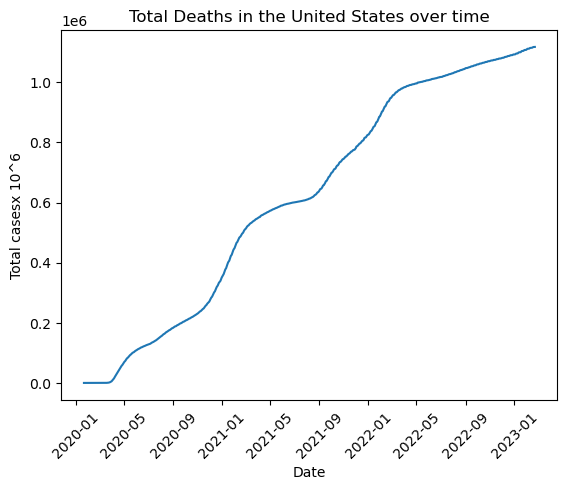

In [44]:
plt.plot(us_df['date'] , us_df['total_deaths'])
plt.xticks(rotation = 45)
plt.title("Total Deaths in the United States over time")
plt.xlabel("Date")
plt.ylabel("Total casesx 10^6")
plt.show()

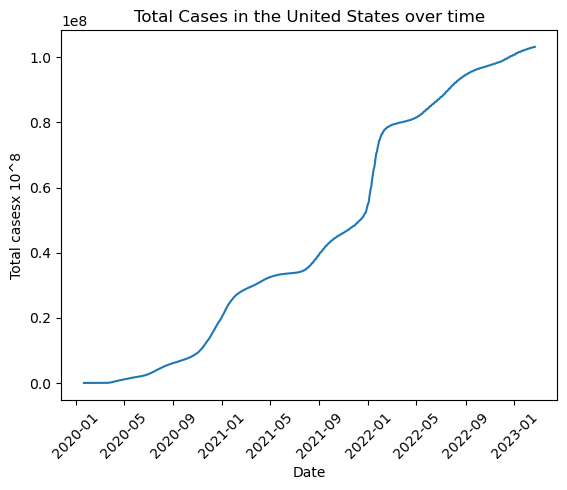

In [45]:
plt.plot(us_df['date'] , us_df['total_cases'])
plt.xticks(rotation = 45)
plt.title("Total Cases in the United States over time")
plt.xlabel("Date")
plt.ylabel("Total casesx 10^8")
plt.show()

In [46]:
"""
In this project, I've chosen Covid-19 Countries Data, So as a first step, I've imported the required libraries such as numpy, pandas, matplotlib.pyplot etc.. then, I've loaded covid_countries_data.csv file by using pd.read_csv. then I looked at the top 200 records we have.  As we have the records cumulative till date 02.21.2023 I filtered the records to be in that date by having a new data frame called  new_df. I got total cases t_cases by using .sum() = 688158743 cases, 
The Maximum number for cases max_cases = 10316853 which is the United States, 
the total number of deaths t_deathes = 6888722, Median number of cases  M_cases = 3142277.37 cases. Minimum number of cases Mi_cases = 1. The minimum number of deaths = 0 so I got the countries that have minimum value = 0 which are Falkland Islands, Saint Helena, Tuvalu and the Vatican. For the second task, I used groupby() for the locations and got the summation of the total deaths in each country then I've chosen the top countries in cases I found the first country with the highest record of cases = United States with   103168534 cases, India was the second country, then France, Germany, Brazil, Japan, South Korea, Italy, United Kingdom at the end Russia with           21878868 cases. Top death cases I found the United States at the first record 1117820
death followed by Brazil, followed by India, then, Russia, Mexico, Peru, United Kingdom, Italy, Germany and  France at the bottom of the list.    
I got a relationship between the population and the total number of deaths then I found nearly when we have a large number of population will have large number of deaths and cases. 
I did a visualization for the top ten countries having  Death Cases by using a bar chart as we see the United States has the first record and the last country is France. I used a Pie chart to show the top ten cases we found the United States has the largest part. I used a line chart to visualize the total cases in the united states over time I found the trend is raising so it is exponential relation between the time and the number of cases. Similarly in the death cases, number of deaths is increasing over time. 
 """

"\nIn this project, I've chosen Covid-19 Countries Data, So as a first step, I've imported the required libraries such as numpy, pandas, matplotlib.pyplot etc.. then, I've loaded covid_countries_data.csv file by using pd.read_csv. then I looked at the top 200 records we have.  As we have the records cumulative till date 02.21.2023 I filtered the records to be in that date by having a new data frame called  new_df. I got total cases t_cases by using .sum() = 688158743 cases, \nThe Maximum number for cases max_cases = 10316853 which is the United States, \nthe total number of deaths t_deathes = 6888722, Median number of cases  M_cases = 3142277.37 cases. Minimum number of cases Mi_cases = 1. The minimum number of deaths = 0 so I got the countries that have minimum value = 0 which are Falkland Islands, Saint Helena, Tuvalu and the Vatican. For the second task, I used groupby() for the locations and got the summation of the total deaths in each country then I've chosen the top countries in